# Plots

In [1]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



#  Plots on real dataset

# Box plot between AUC scores Vs models for 10 and all features

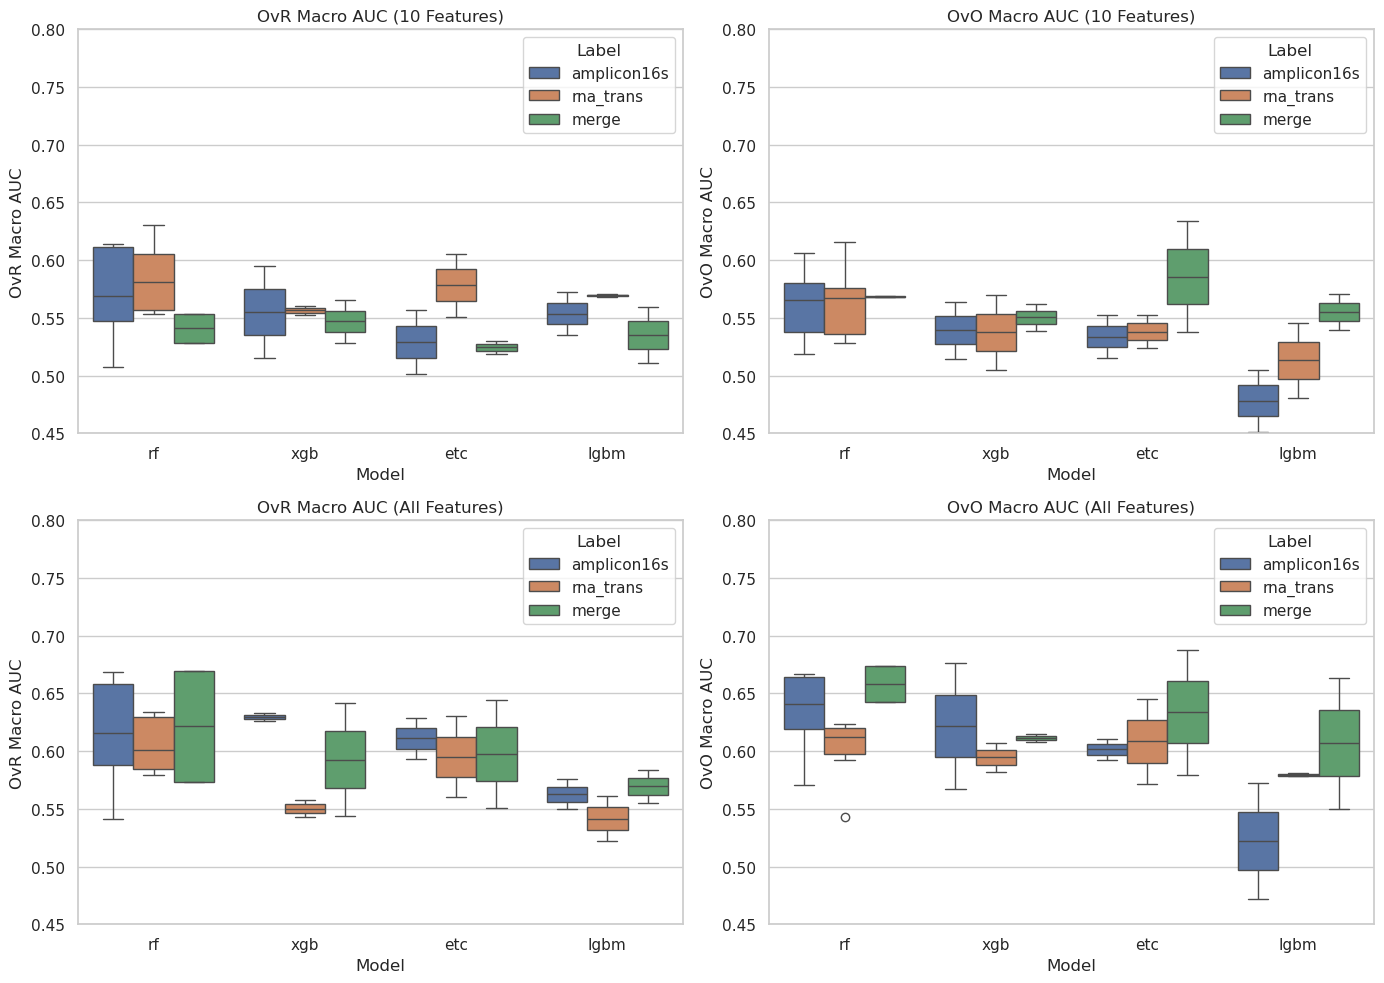

In [57]:

def plot_box(file_path,x_axis):
    # read dataset
    df = pd.read_csv(file_path)
    
    # Convert "Features (k)" to numeric
    df["Features (k)"] = pd.to_numeric(df["Features (k)"], errors="coerce")
    
    # Separate data based on number of features
    df_10_features = df[df["Features (k)"] == 10]
    df_all_features = df[df["Features (k)"] != 10]  # Assuming "all features" is any value other than 10
    
    # Set up plotting style
    sns.set_theme(style="whitegrid")

    # set common y range 
    y_min = 0.45
    y_max = 0.8
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot OvR Macro AUC for 10 features
    sns.boxplot(data=df_10_features, x=x_axis, y="OvR Macro AUC", hue="Label", ax=axes[0, 0])
    axes[0, 0].set_title("OvR Macro AUC (10 Features)")
    axes[0, 0].set_ylim(y_min, y_max)
    
    # Plot OvO Macro AUC for 10 features
    sns.boxplot(data=df_10_features, x=x_axis, y="OvO Macro AUC", hue="Label", ax=axes[0, 1])
    axes[0, 1].set_title("OvO Macro AUC (10 Features)")
    axes[0, 1].set_ylim(y_min, y_max)
    
    # Plot OvR Macro AUC for all features
    sns.boxplot(data=df_all_features, x=x_axis, y="OvR Macro AUC", hue="Label", ax=axes[1, 0])
    axes[1, 0].set_title("OvR Macro AUC (All Features)")
    axes[1, 0].set_ylim(y_min, y_max)
    
    # Plot OvO Macro AUC for all features
    sns.boxplot(data=df_all_features, x=x_axis, y="OvO Macro AUC", hue="Label", ax=axes[1, 1])
    axes[1, 1].set_title("OvO Macro AUC (All Features)")
    axes[1, 1].set_ylim(y_min, y_max)
    
    # Adjust layout and save figure
    plt.tight_layout()
    save_dir="results/plots_images"
    filepath=os.path.join(save_dir, "AUC_Comparison_10_vs_All_Features.png")

    # if plot exists, drop and replace with updated one 
    if not os.path.exists(filepath):
        plt.savefig(filepath)
    else:
        os.remove(filepath)
        plt.savefig(filepath)
        
    plt.show()

plot_box("results/real.csv","Model")

# boxplot: classwise Macro AUC vs Model for 10 and all features

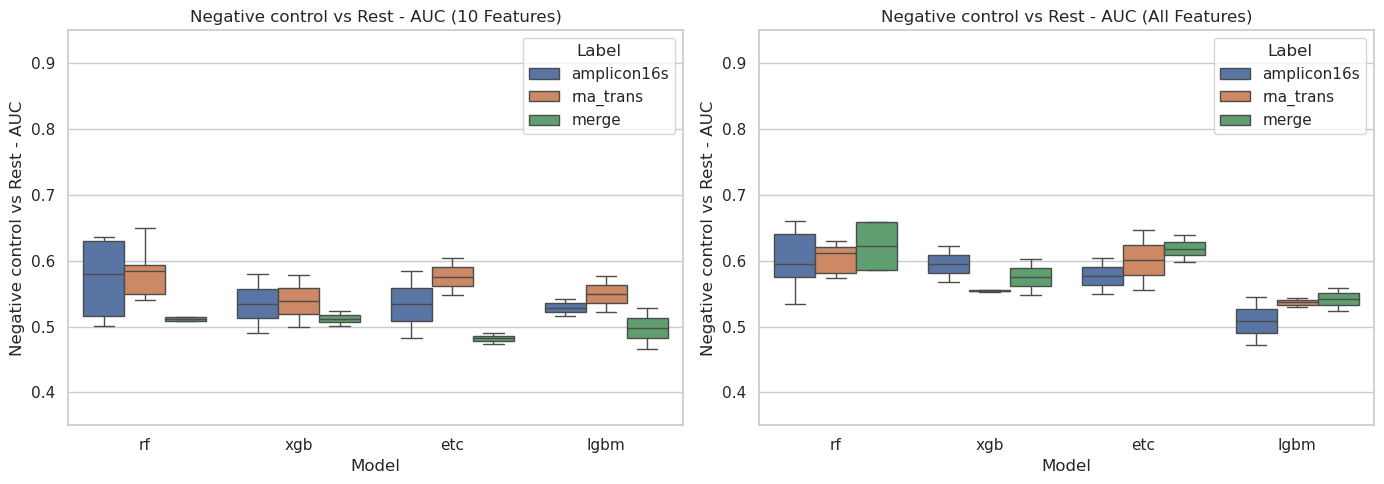

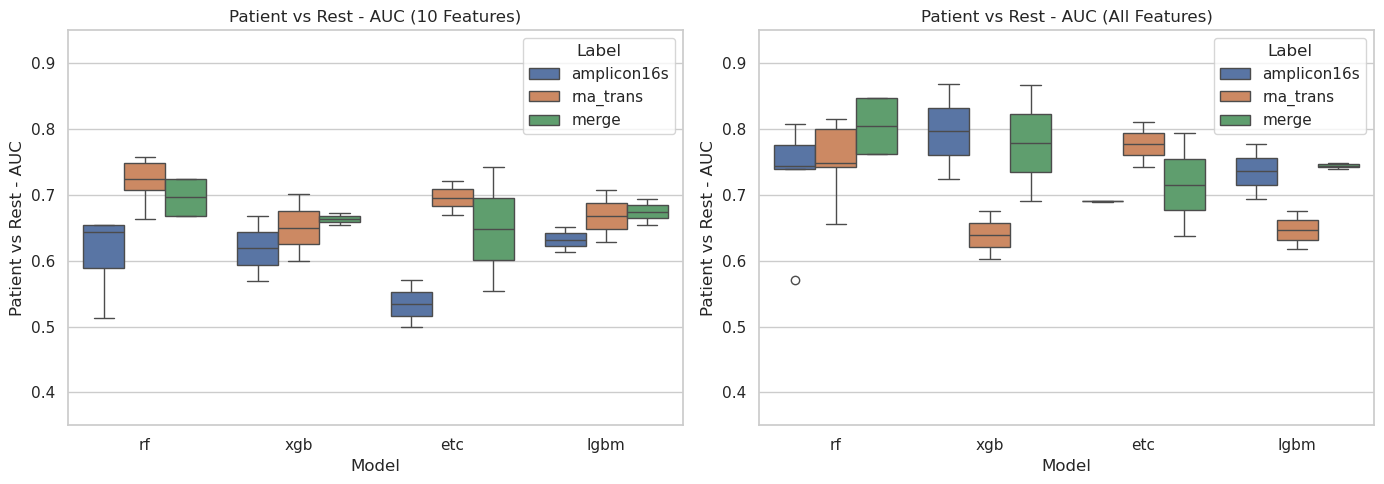

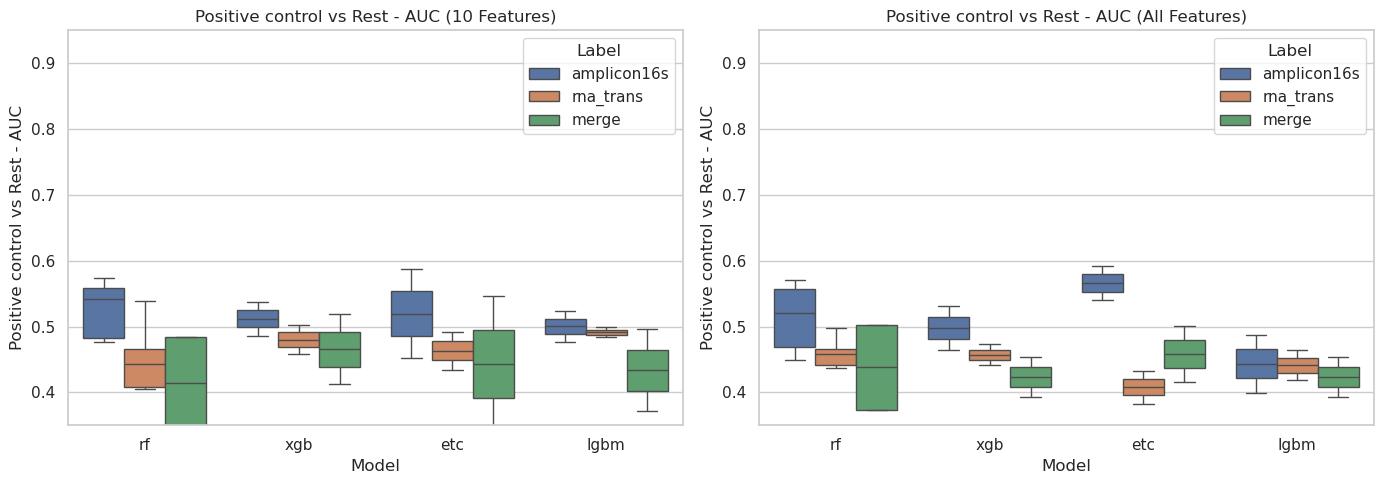

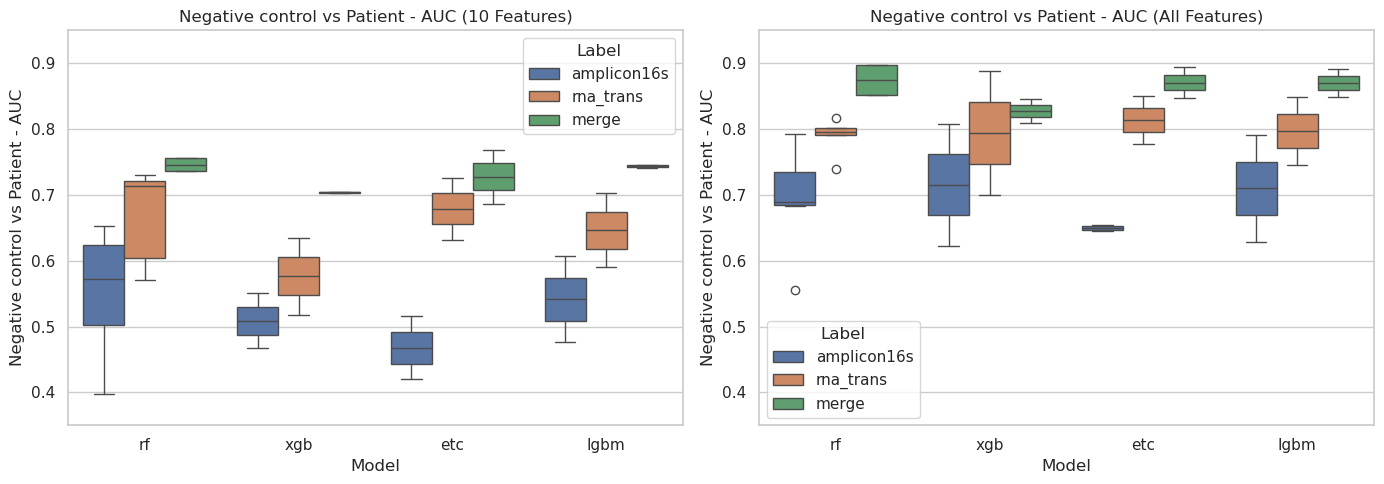

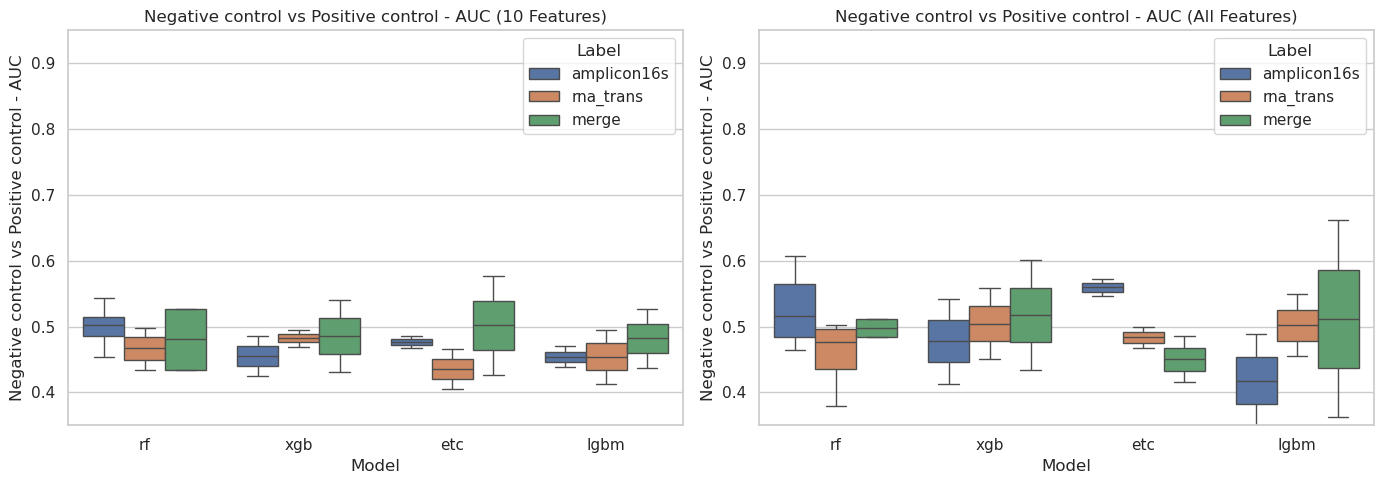

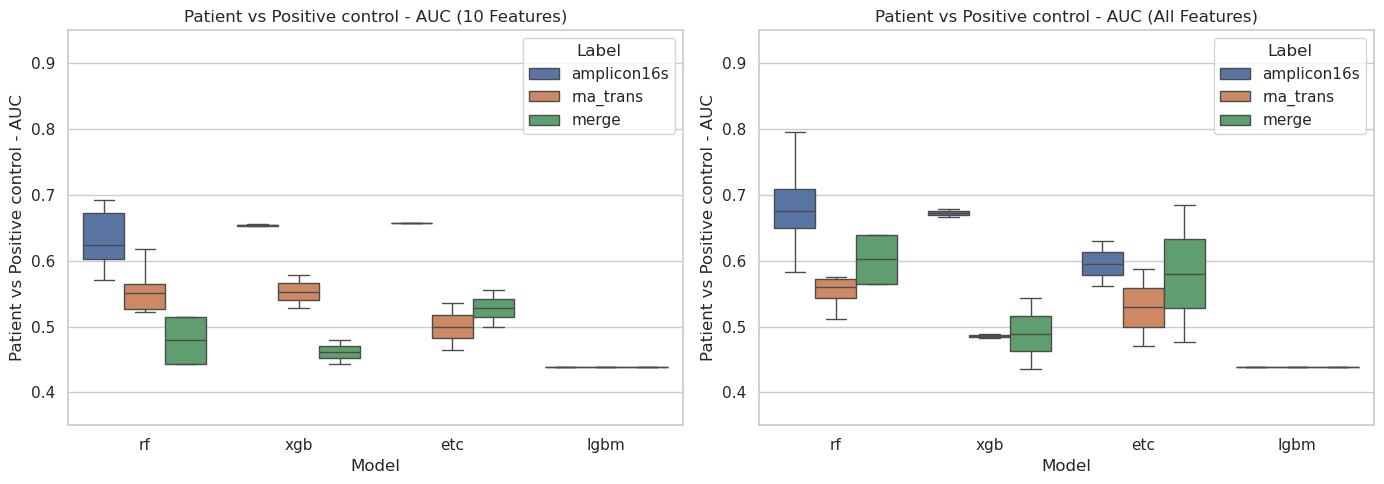

In [56]:
def classwise_auc_plot(file_path,x_axis):
    #read df
    df = pd.read_csv(file_path)
    
    # Convert "Features (k)" to numeric
    df["Features (k)"] = pd.to_numeric(df["Features (k)"], errors="coerce")
    
    # Separate data based on number of features
    df_10_features = df[df["Features (k)"] == 10]
    df_all_features = df[df["Features (k)"] != 10]  # Assuming "all features" means not 10
    
    # Define class-wise AUC columns
    class_auc_columns = [
        "Negative control vs Rest - AUC",
        "Patient vs Rest - AUC",
        "Positive control vs Rest - AUC",
        "Negative control vs Patient - AUC",
        "Negative control vs Positive control - AUC",
        "Patient vs Positive control - AUC"
    ]
    
    # set common y range
    y_min=0.35
    y_max=0.95
    
    # Set up plotting style
    sns.set_theme(style="whitegrid")
    
    # --- PLOT CLASS-WISE AUCs ---
    for col in class_auc_columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
        # Plot for 10 features
        sns.boxplot(data=df_10_features, x=x_axis, y=col, hue="Label", ax=axes[0])
        axes[0].set_title(f"{col} (10 Features)")
        axes[0].set_ylim(y_min, y_max)
        
        # Plot for all features
        sns.boxplot(data=df_all_features, x=x_axis, y=col, hue="Label", ax=axes[1])
        axes[1].set_title(f"{col} (All Features)")
        axes[1].set_ylim(y_min, y_max)
        
        # Adjust layout and save the figure
        plt.tight_layout()
        filename = col.replace(" ", "_").replace("-", "").replace("/", "_") + "_Comparison.png"
        save_dir="results/plots_images"
        filepath=os.path.join(save_dir, filename)

        # if plot exists , drop and replace with updated one 
        if not os.path.exists(filepath):
            plt.savefig(filepath)
        else:
            os.remove(filepath)
            plt.savefig(filepath)   
        plt.show()
classwise_auc_plot("results/real.csv","Model")

# bar graphs between Macro AUC vs models for 10 and all features for overall dataset

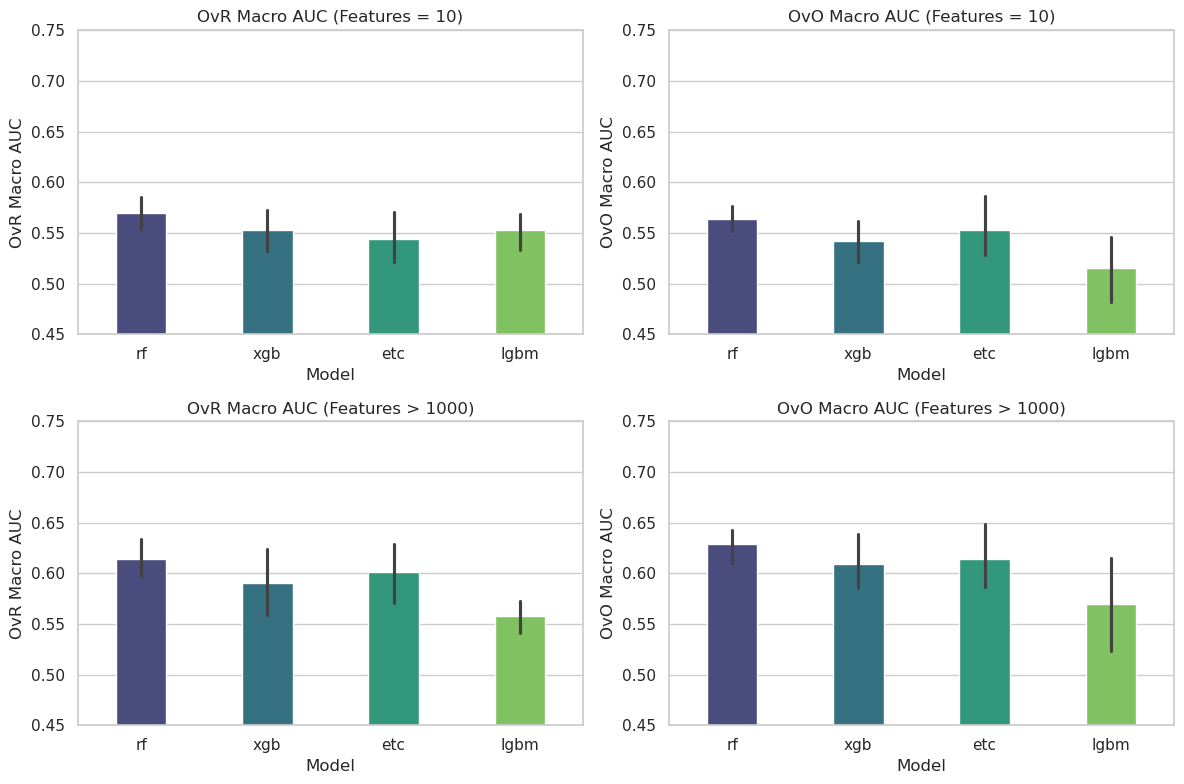

In [55]:
df = pd.read_csv("results/real.csv")


sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})


# Plot performance metrics for different feature sets
for idx, k in enumerate([10, 1000]):
     
    if k == 10:
        subset_df = df[df["Features (k)"] == k]  # For Features = 10
    else:
        subset_df = df[df["Features (k)"] > k]  # For Features > 1000

    # Define common y-axis range
    y_min = 0.45
    y_max = 0.75

   
    
    # OvR Macro AUC (Bar Chart)
    sns.barplot(x="Model", y="OvR Macro AUC", hue="Model", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.4)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>'} {k})")
    axes[idx,0].set_ylim(y_min, y_max)

    # OvO macro AUC bar chart
    sns.barplot(x="Model", y="OvO Macro AUC", hue="Model", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.4)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>'} {k})")
    axes[idx,1].set_ylim(y_min, y_max)
    ax.set_xlabel("Model")
    ax.set_ylabel("AUC Score")
       
plt.subplots_adjust(hspace=0.4) # for proper spacing 

# save final plot
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "barplot_AUC_Comparison_10_vs_All_Features.png")

# if plot exists, drop and replace with updated one 
if not os.path.exists(filepath):
    plt.savefig(filepath)
else:
    os.remove(filepath)
    plt.savefig(filepath)
plt.tight_layout()
plt.show()


    
  

# bar graph between  MacroAUC  vs sampling strategies  

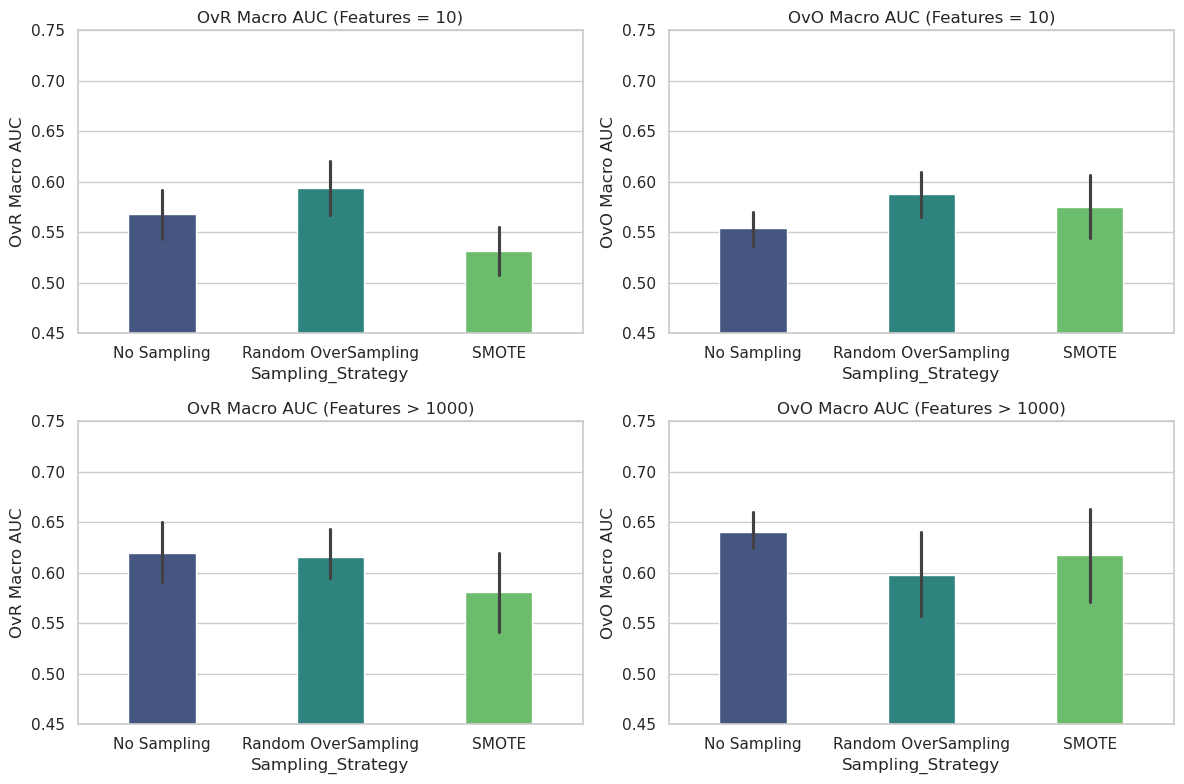

In [54]:
#read dataset
df = pd.read_csv("results/real.csv")


sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

# Plot performance metrics for different feature sets
for idx, k in enumerate([10, 1000]):
     
    if k == 10:
        subset_df = df[df["Features (k)"] == k]  # For Features = 10
    else:
        subset_df = df[df["Features (k)"] > k]  # For Features > 1000

    # Define common y-axis range
    y_min = 0.45
    y_max = 0.75

   
    
    # OvR Macro AUC (Bar Chart)
    ax = axes[idx//2, idx%2]
    sns.barplot(x="Sampling_Strategy", y="OvR Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.4,legend=False)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>'} {k})")
    axes[idx,0].set_ylim(y_min, y_max)

    # OvO macro AUC bar chart 
    sns.barplot(x="Sampling_Strategy", y="OvO Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.4,legend=False)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>'} {k})")
    axes[idx,1].set_ylim(y_min, y_max)
    
  
plt.subplots_adjust(hspace=0.4) #  for proper spacing within plots 

# save final plot 
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "barplot_sampling_vs_AUC.png")

# if plot exists , drop and replace with updated one 
if not os.path.exists(filepath):
    plt.savefig(filepath)
else:
    os.remove(filepath)
    plt.savefig(filepath)
plt.tight_layout()
plt.show()


    
  

# synthetic datasets

# Box plot between AUC scores Vs models for 10 and all features

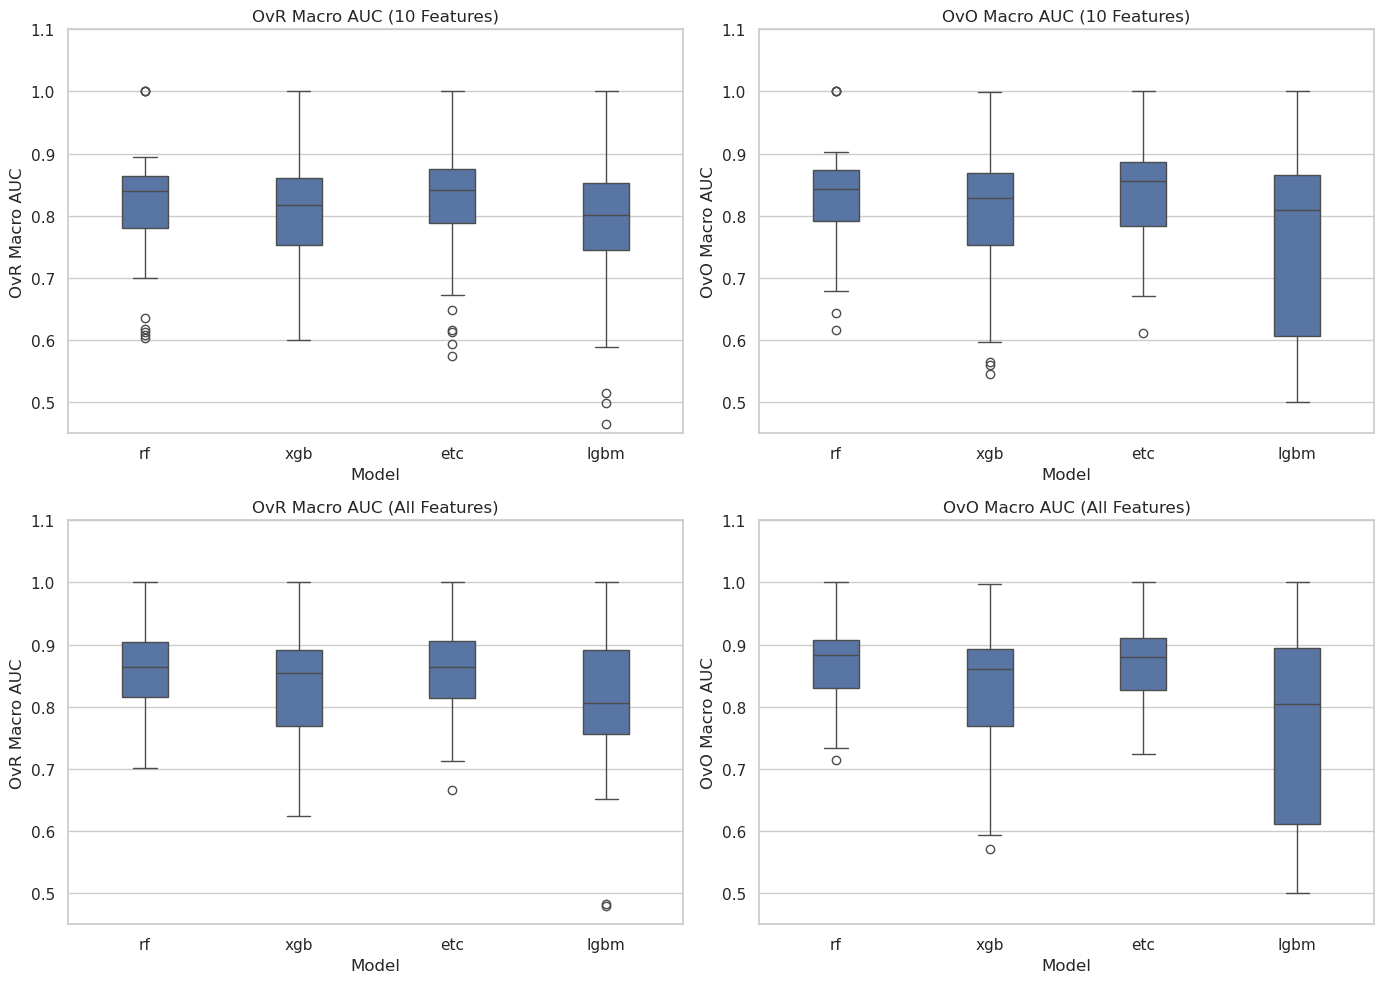

In [53]:

def plot_box(file_path,x_axis):
    
    df = pd.read_csv(file_path)
    
    # Convert "Features (k)" to numeric
    df["Features (k)"] = pd.to_numeric(df["Features (k)"], errors="coerce")
    
    # Separate data based on number of features
    df_10_features = df[df["Features (k)"] == 10]
    df_all_features = df[df["Features (k)"] != 10]  # Assuming "all features" is any value other than 10
    
    # Set up plotting style
    sns.set_theme(style="whitegrid")

    # limit y axis 
    y_max=1.1
    y_min=0.45
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Plot OvR Macro AUC for 10 features
    sns.boxplot(data=df_10_features, x=x_axis, y="OvR Macro AUC", ax=axes[0, 0], width=0.3)
    axes[0, 0].set_title("OvR Macro AUC (10 Features)")
    axes[0,0].set_ylim(y_min, y_max)
    
    # Plot OvO Macro AUC for 10 features
    sns.boxplot(data=df_10_features, x=x_axis, y="OvO Macro AUC", ax=axes[0, 1], width=0.3)
    axes[0, 1].set_title("OvO Macro AUC (10 Features)")
    axes[0,1].set_ylim(y_min, y_max)
    
    # Plot OvR Macro AUC for all features
    sns.boxplot(data=df_all_features, x=x_axis, y="OvR Macro AUC", ax=axes[1, 0], width=0.3)
    axes[1, 0].set_title("OvR Macro AUC (All Features)")
    axes[1,0].set_ylim(y_min, y_max)
    
    # Plot OvO Macro AUC for all features
    sns.boxplot(data=df_all_features, x=x_axis, y="OvO Macro AUC", ax=axes[1, 1], width=0.3)
    axes[1, 1].set_title("OvO Macro AUC (All Features)")
    axes[1,1].set_ylim(y_min, y_max)
    
    # Adjust layout and save figure
    plt.subplots_adjust(hspace=0.4)
    plt.tight_layout()

    # save final plot in result folder
    save_dir="results/plots_images"
    filepath=os.path.join(save_dir, "syn_AUC_Comparison_10_vs_All_Features.png")

    # if plot exists, drop and replace with updated one 
    if not os.path.exists(filepath):
        plt.savefig(filepath)
    else:
        os.remove(filepath)
        plt.savefig(filepath)
      
    
    plt.show()

plot_box("results/synthetic.csv","Model")

# boxplot: classwise Macro AUC vs Model for 10 and all features

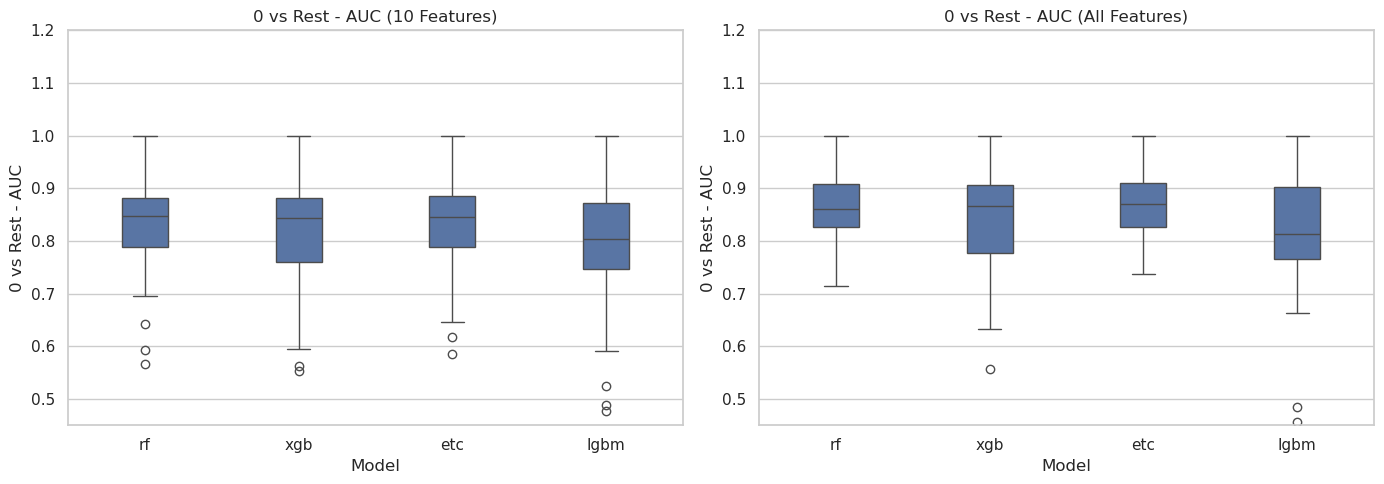

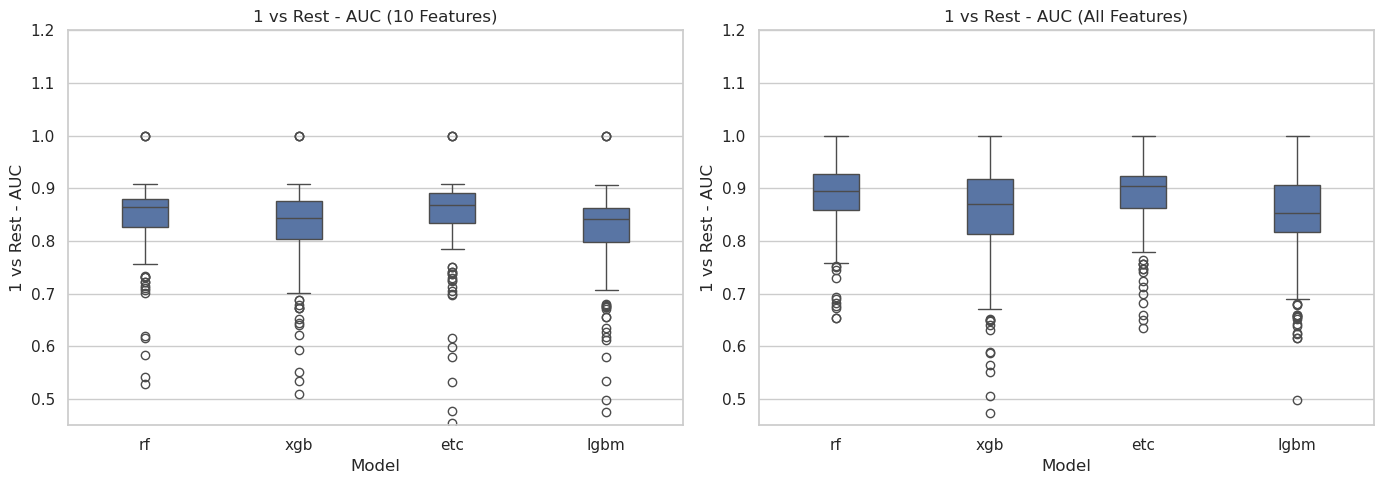

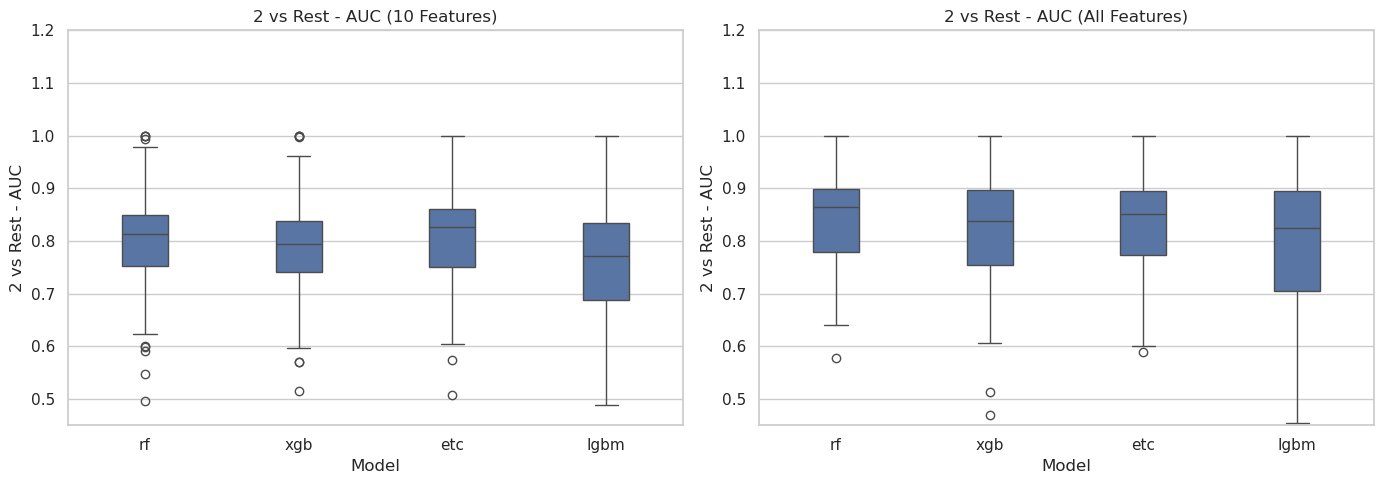

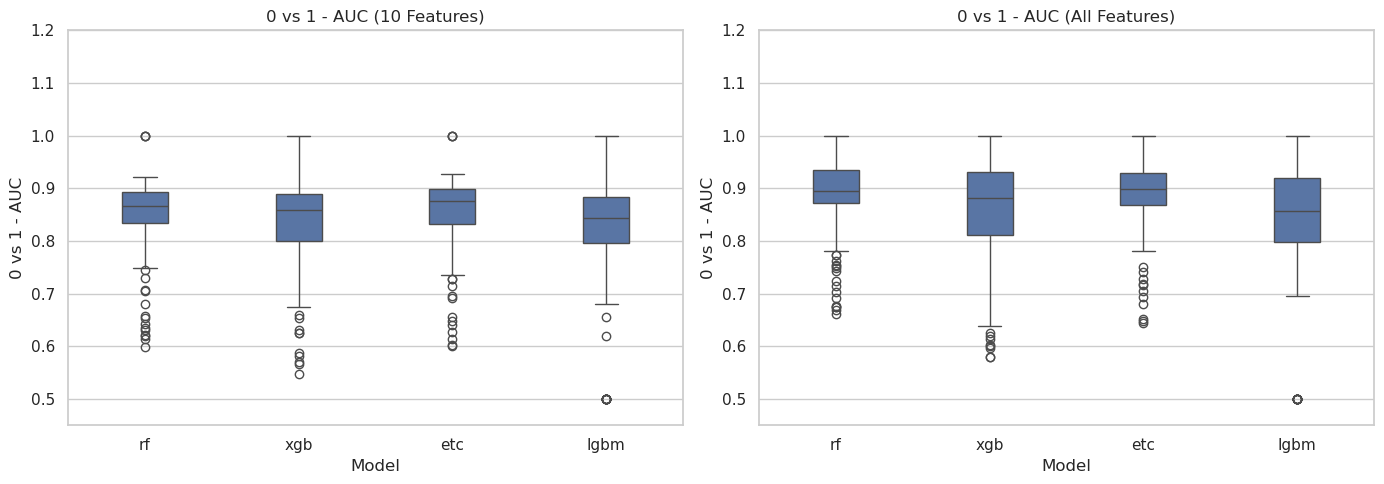

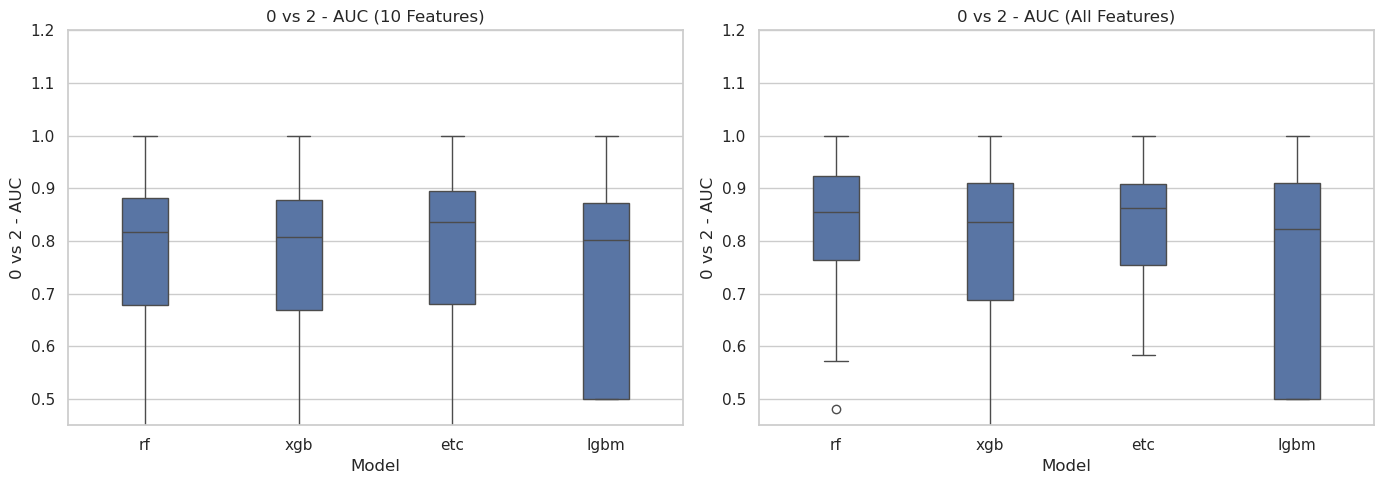

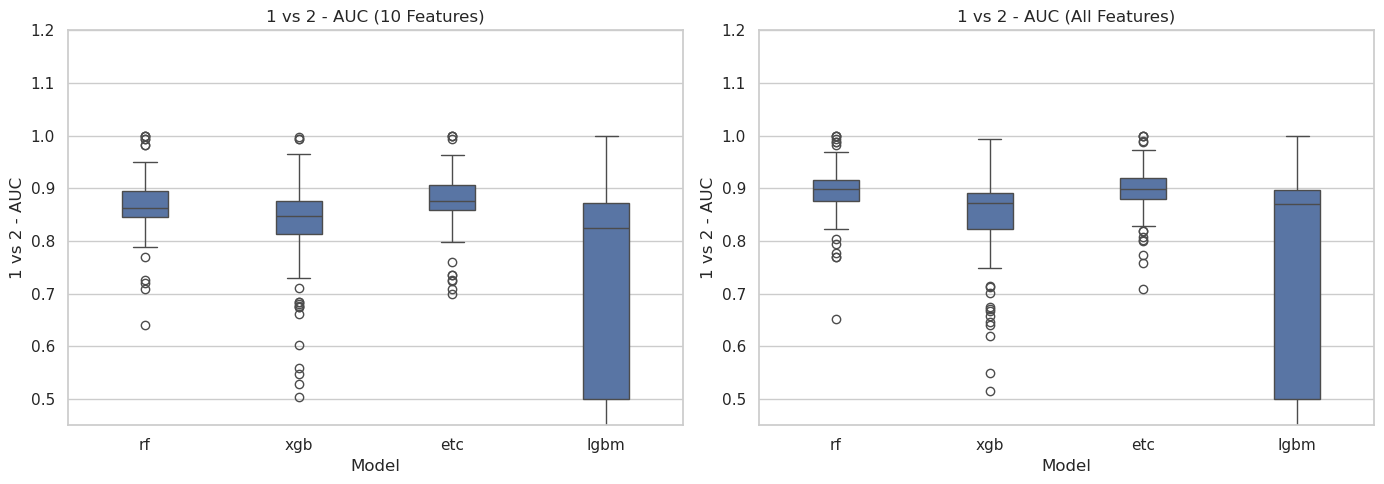

In [52]:
def classwise_auc_plot(file_path,x_axis):
    #read df
    df = pd.read_csv(file_path)
    
    # Convert "Features (k)" to numeric
    df["Features (k)"] = pd.to_numeric(df["Features (k)"], errors="coerce")
    
    # Separate df based on number of features
    df_10_features = df[df["Features (k)"] == 10]
    df_all_features = df[df["Features (k)"] != 10]  # Assuming "all features" means not 10
    
    # Define class-wise AUC columns
    class_auc_columns = [
        "0 vs Rest - AUC",
        "1 vs Rest - AUC",
        "2 vs Rest - AUC",
        "0 vs 1 - AUC",
        "0 vs 2 - AUC",
        "1 vs 2 - AUC"
    ]
    
    # Set up plotting style
    sns.set_theme(style="whitegrid")
    
    # limits of y axis 
    y_max=1.2
    y_min=0.45
    
    # --- PLOT CLASS-WISE AUCs ---
    for col in class_auc_columns:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Plot for 10 features
        sns.boxplot(data=df_10_features, x=x_axis, y=col, ax=axes[0], width=0.3)
        axes[0].set_title(f"{col} (10 Features)")
        axes[0].set_ylim(y_min, y_max)
        
        # Plot for all features
        sns.boxplot(data=df_all_features, x=x_axis, y=col, ax=axes[1],width=0.3)
        axes[1].set_title(f"{col} (All Features)")
        axes[1].set_ylim(y_min, y_max)
    
        # Adjust layout and save the figure
        plt.tight_layout()
        filename = col.replace(" ", "_").replace("-", "").replace("/", "_") + "_Comparison.png"

        # save resultant plot in result folder
        save_dir="results/plots_images"
        filepath=os.path.join(save_dir, filename)

        # if plot exists, drop and replace with updated one 
        if not os.path.exists(filepath):
            plt.savefig(filepath)
        else:
            os.remove(filepath)
            plt.savefig(filepath)
          
        
        plt.show()
classwise_auc_plot("results/synthetic.csv","Model")

# bar graphs between Macro AUC vs models for 10 and all features

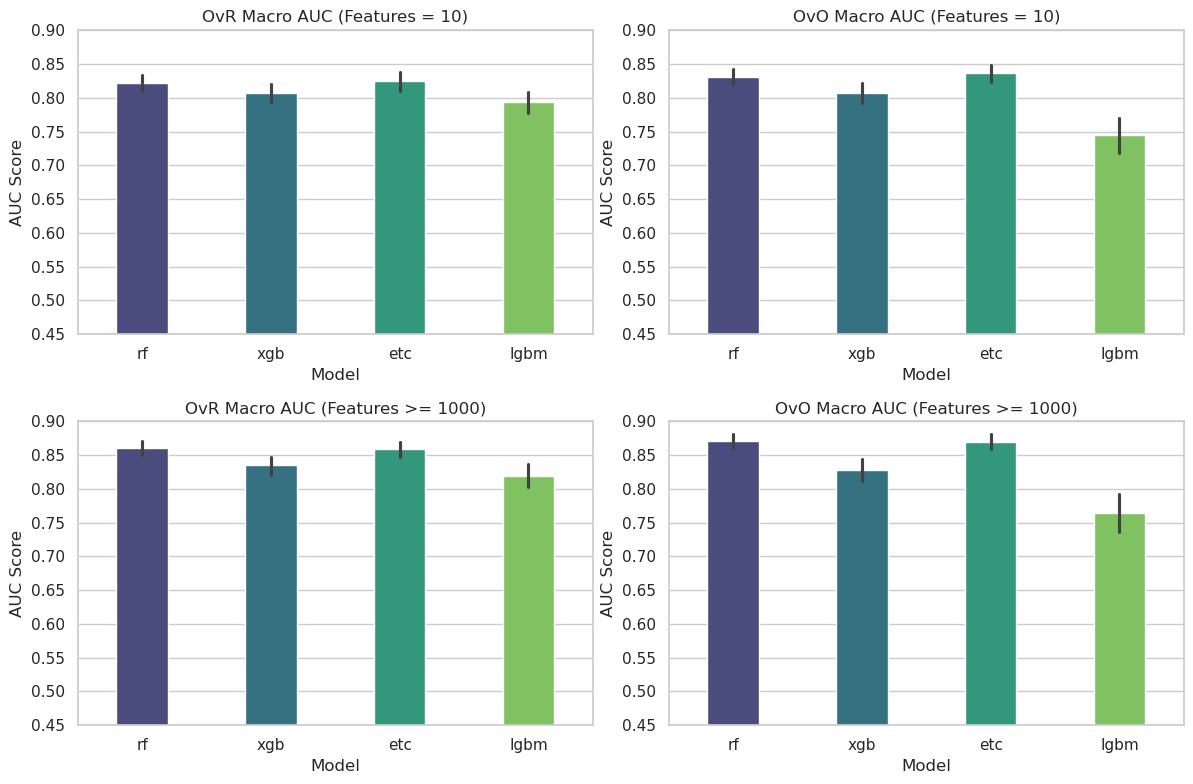

In [51]:
#read dataset
df = pd.read_csv("results/synthetic.csv")

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

# Plot performance metrics for different feature sets
for idx, k in enumerate([10, 1000]):
     
    if k == 10:
        subset_df = df[df["Features (k)"] == k]  # For Features = 10
    else:
        subset_df = df[df["Features (k)"] >= k]  # For Features > 1000

    # Define common y-axis range
    y_min = 0.45
    y_max = 0.9

   
    
    # OvR Macro AUC (Bar Chart)
    sns.barplot(x="Model", y="OvR Macro AUC", hue="Model", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.4)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,0].set_ylim(y_min, y_max)
    axes[idx,0].set_xlabel("Model")
    axes[idx,0].set_ylabel("AUC Score")
    
    # OvO Macro AUC bar chart
    sns.barplot(x="Model", y="OvO Macro AUC", hue="Model", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.4)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,1].set_ylim(y_min, y_max)
    axes[idx,1].set_xlabel("Model")
    axes[idx,1].set_ylabel("AUC Score")
    
plt.subplots_adjust(hspace=0.4) # for proper spacing within plots 

# save final plot in result folder 
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "syn_barplot_AUC_Comparison_10_vs_All_Features.png")

# if plot exists, drop and replace with updated one
if not os.path.exists(filepath):
    plt.savefig(filepath)
else:
    os.remove(filepath)
    plt.savefig(filepath)
plt.tight_layout()
plt.show()


    
  

# bar graph between MacroAUC vs sampling strategies

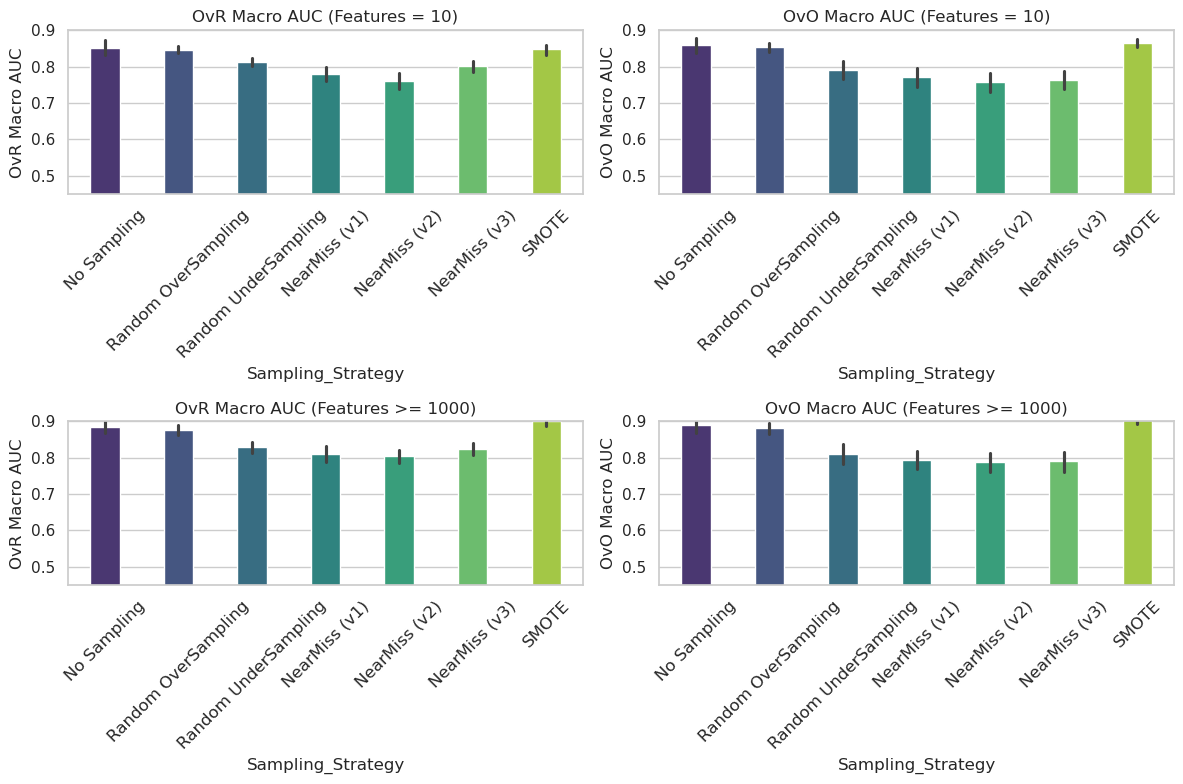

In [49]:
# read dataset 
df = pd.read_csv("results/synthetic.csv")

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})
 
# Plot performance metrics for different feature sets
for idx, k in enumerate([10, 1000]):
     
    if k == 10:
        subset_df = df[df["Features (k)"] == k]  # For Features = 10
    else:
        subset_df = df[df["Features (k)"] >=k]  # For Features > 1000

    # Define common y-axis range
    y_min = 0.45
    y_max = 0.9

   
    
    # OvR Macro AUC (Bar Chart)
    ax = axes[idx//2, idx%2]
    sns.barplot(x="Sampling_Strategy", y="OvR Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.4, legend=False)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx, 0].tick_params(axis="x", rotation=45, labelsize=12) # for clear display 
    axes[idx,0].set_ylim(y_min, y_max)

    # OvO macro AUC bar chart 
    sns.barplot(x="Sampling_Strategy", y="OvO Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.4, legend=False)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx, 1].tick_params(axis="x", rotation=45, labelsize=12) # for clear display 
    axes[idx,1].set_ylim(y_min, y_max)
   
   
plt.subplots_adjust(hspace=0.8) # for proper spacing 

# saving final plots in result folder 
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "syn_barplot_sampling_vs_AUC.png")
# if plot name exists , drop and replace it with updated one 
if not os.path.exists(filepath):
    plt.savefig(filepath)
else:
    os.remove(filepath)
    plt.savefig(filepath)
plt.tight_layout()
plt.show()


    
  

# n_redundant values vs models

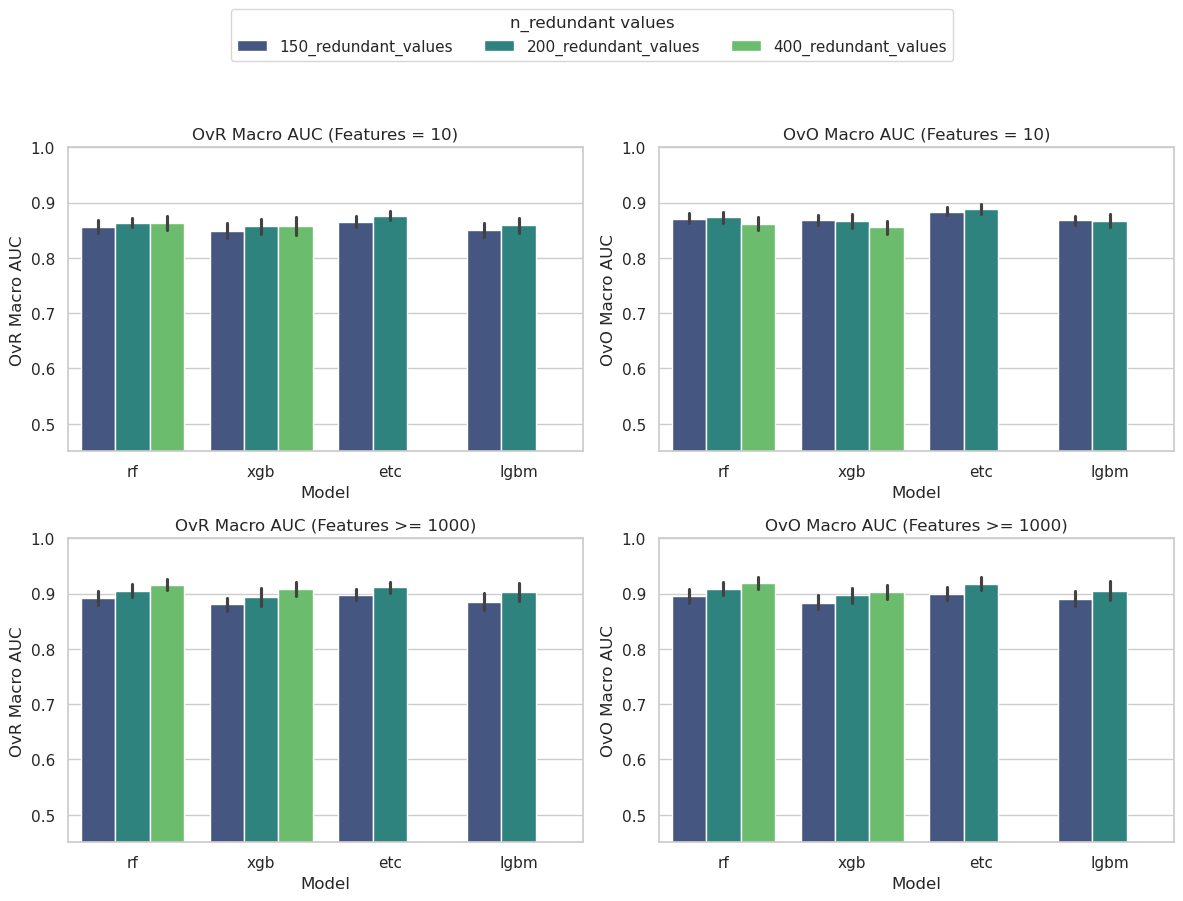

In [47]:
# read dataset
df = pd.read_csv("results/synthetic.csv")


sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

# Plot performance metrics for different feature sets
for idx, k in enumerate([10, 1000]):     
    if k == 10:
         # For Features = 10 and weight = [0.8, 0.2, 0.1]
        subset_df = df[(df["Features (k)"] == k) & (df["Label"].str.contains("redundant_values"))] 
    else:
        # For Features > 1000
        subset_df = df[(df["Features (k)"] >=k) & (df["Label"].str.contains("redundant_values"))]  

    # Define common y-axis range
    y_min = 0.45
    y_max = 1

   
    # OvR Macro AUC (Bar Chart)
    ax = axes[idx//2, idx%2]
    bar1=sns.barplot(x="Model", y="OvR Macro AUC", hue="Label", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.8)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,0].set_ylim(y_min, y_max)
    
    # OvO Macro AUC bar chart 
    bar2=sns.barplot(x="Model", y="OvO Macro AUC", hue="Label", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.8,legend=False)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,1].set_ylim(y_min, y_max)

    # get legend value from bar 1 and then remove it from bar 1 for clear display
    handles, labels = bar1.get_legend_handles_labels()
    bar1.legend_.remove()  # Remove the legend from the plot

# display legend for clarity
fig.legend(handles, labels, title="n_redundant values", loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3)
plt.subplots_adjust(hspace=2, wspace=0.3)  # for proper spacing between plots 

# saving plots in result folder
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "redundant_vs_models.png")
if not os.path.exists(filepath):
    plt.savefig(filepath)
else:
    os.remove(filepath)
    plt.savefig(filepath)
plt.tight_layout()
plt.show()

# n_redundant values vs Sampling strategies

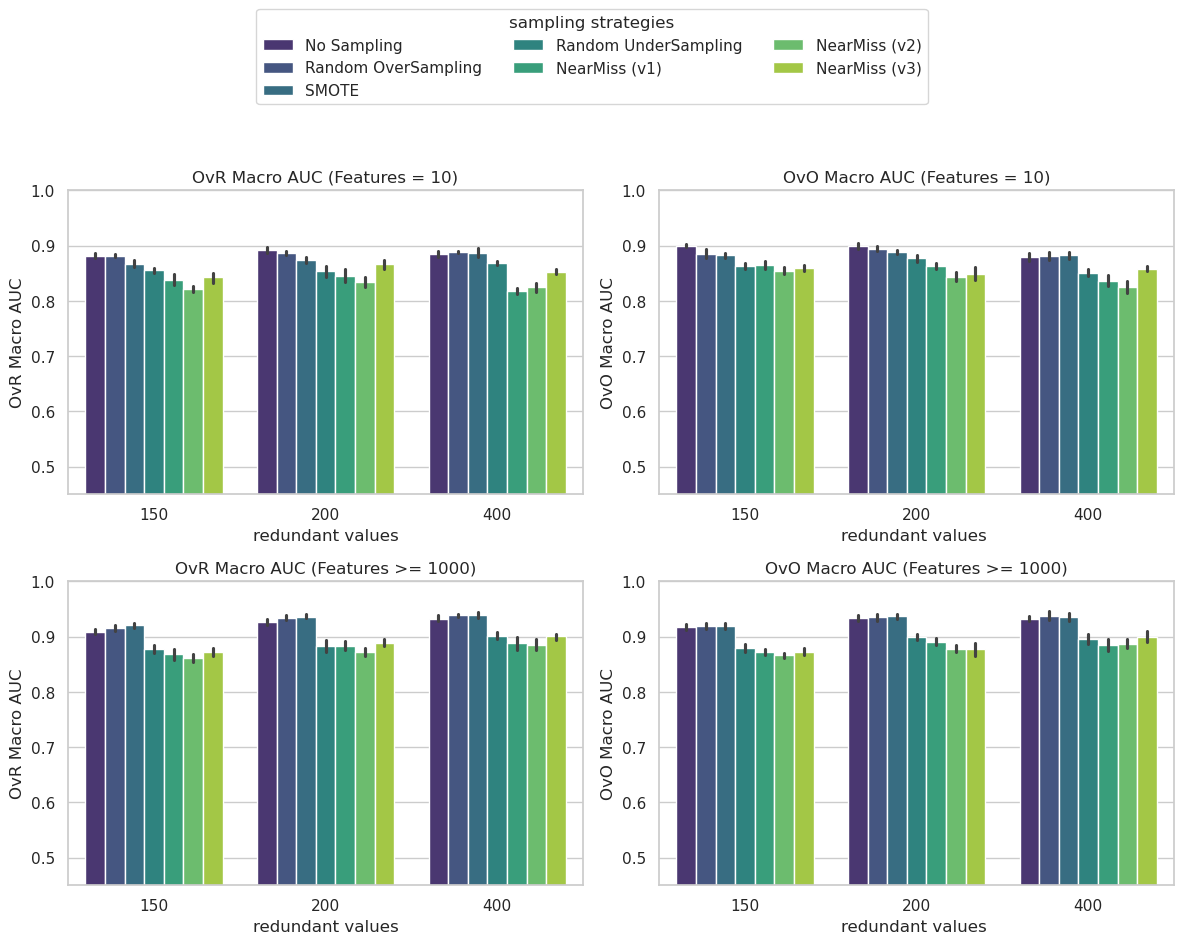

In [46]:
# read dataset
df = pd.read_csv("results/synthetic.csv")

# Plot performance metrics for different feature sets
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

for idx, k in enumerate([10, 1000]):
     
    if k == 10:
         # For Features = 10 and weight = [0.8, 0.2, 0.1]
        subset_df = df[(df["Features (k)"] == k) & (df["Label"].str.contains("redundant_values"))] 
    else:
        # For Features > 1000
        subset_df = df[(df["Features (k)"] >=k) & (df["Label"].str.contains("redundant_values"))]  

    # Define common y-axis range
    y_min = 0.45
    y_max = 1

    # new labels for clear display
    short_labels = {
    "150_redundant_values": "150",
    "200_redundant_values": "200",
    "400_redundant_values": "400" 
    }
    subset_df.loc[:, "Label"] = subset_df["Label"].replace(short_labels)
    
    # OvR Macro AUC (Bar Chart)
    ax = axes[idx//2, idx%2]
    bar1=sns.barplot(x="Label", y="OvR Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.8)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,0].set_ylim(y_min, y_max)
    axes[idx, 0].set_xlabel("redundant values")

    # OvO Macro AUC bar chart 
    bar2=sns.barplot(x="Label", y="OvO Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.8,legend=False)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,1].set_ylim(y_min, y_max)
    axes[idx, 1].set_xlabel("redundant values ")

    
    # get legend value from bar 1 and then remove it from bar 1 for clear display
    handles, labels = bar1.get_legend_handles_labels()
    bar1.legend_.remove()  # Remove the legend from the plot

# display legend 
fig.legend(handles, labels, title="sampling strategies", loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3)

plt.subplots_adjust(hspace=2, wspace=0.3)

# saving plot images in result folder
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "redundant_vs_sampling_strategy.png")
if not os.path.exists(filepath):
    plt.savefig(filepath)
else:
    os.remove(filepath)
    plt.savefig(filepath)
plt.tight_layout()
plt.show()

#  n_sample values vs model 

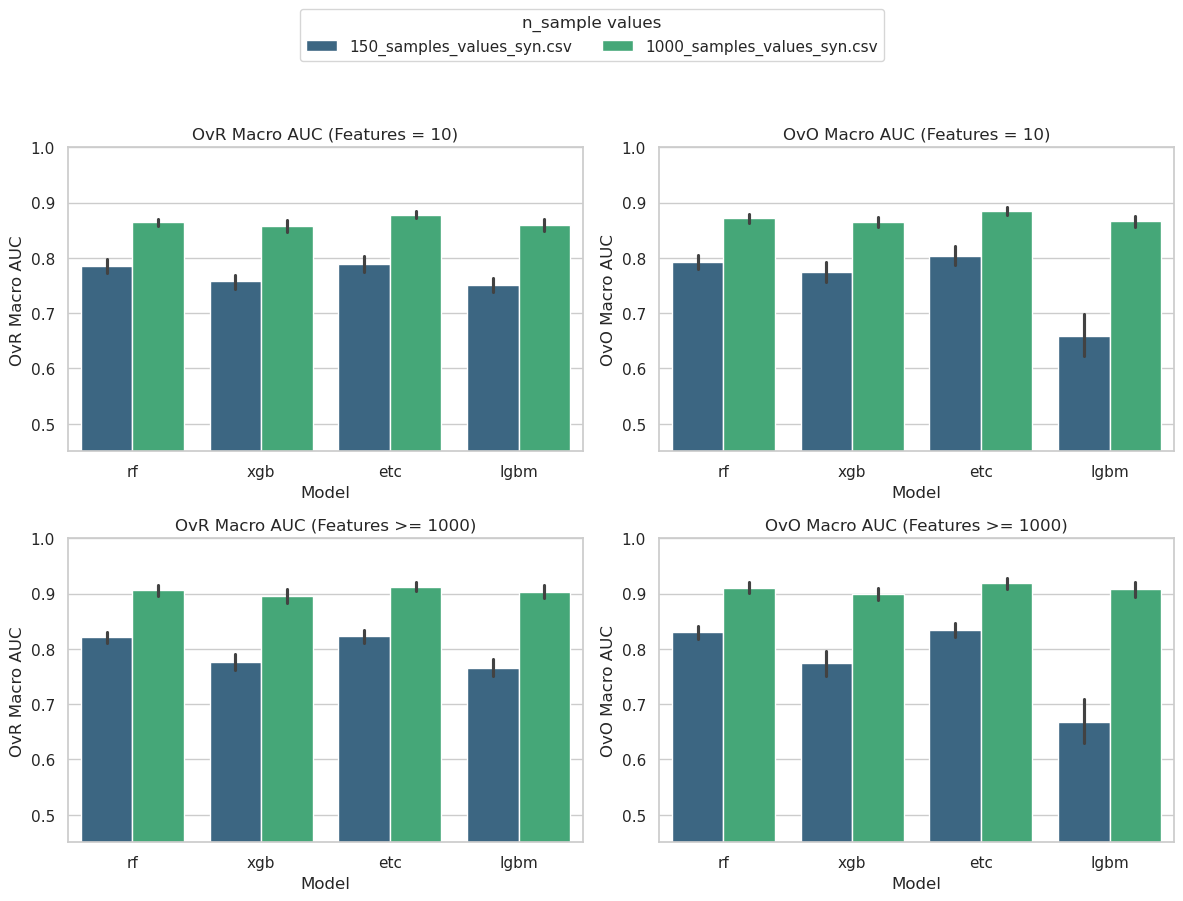

In [30]:
#read dataset
df = pd.read_csv("results/synthetic.csv")


sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

# Plot performance metrics for different feature sets
for idx, k in enumerate([10, 1000]):
     
    if k == 10:
         # For Features = 10 
        subset_df = df[(df["Features (k)"] == k) & (df["Label"].str.contains("samples_values"))] 
    else:
        # For Features > 1000
        subset_df = df[(df["Features (k)"] >=k) & (df["Label"].str.contains("samples_values"))]  

    # Define common y-axis range
    y_min = 0.45
    y_max = 1

    # OvR Macro AUC (Bar Chart)
    ax = axes[idx//2, idx%2]
    bar1=sns.barplot(x="Model", y="OvR Macro AUC", hue="Label", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.8)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,0].set_ylim(y_min, y_max)

    # OVO Macro AUC bar chart
    bar2=sns.barplot(x="Model", y="OvO Macro AUC", hue="Label", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.8,legend=False)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,1].set_ylim(y_min, y_max)

    # taking legend from first plot and then removing for clarity
    handles, labels = bar1.get_legend_handles_labels()
    bar1.legend_.remove()  # Remove the legend from the plot

# setting legend for clarity
fig.legend(handles, labels, title="n_sample values", loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3)
plt.subplots_adjust(hspace=2, wspace=0.3)



# save plot images in result folder
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "n_sample_vs_models.png")
if not os.path.exists(filepath):
    plt.savefig(filepath)
else:
    os.remove(filepath)
    plt.savefig(filepath)
plt.tight_layout()
plt.show()

# n_samples vs sampling strategies

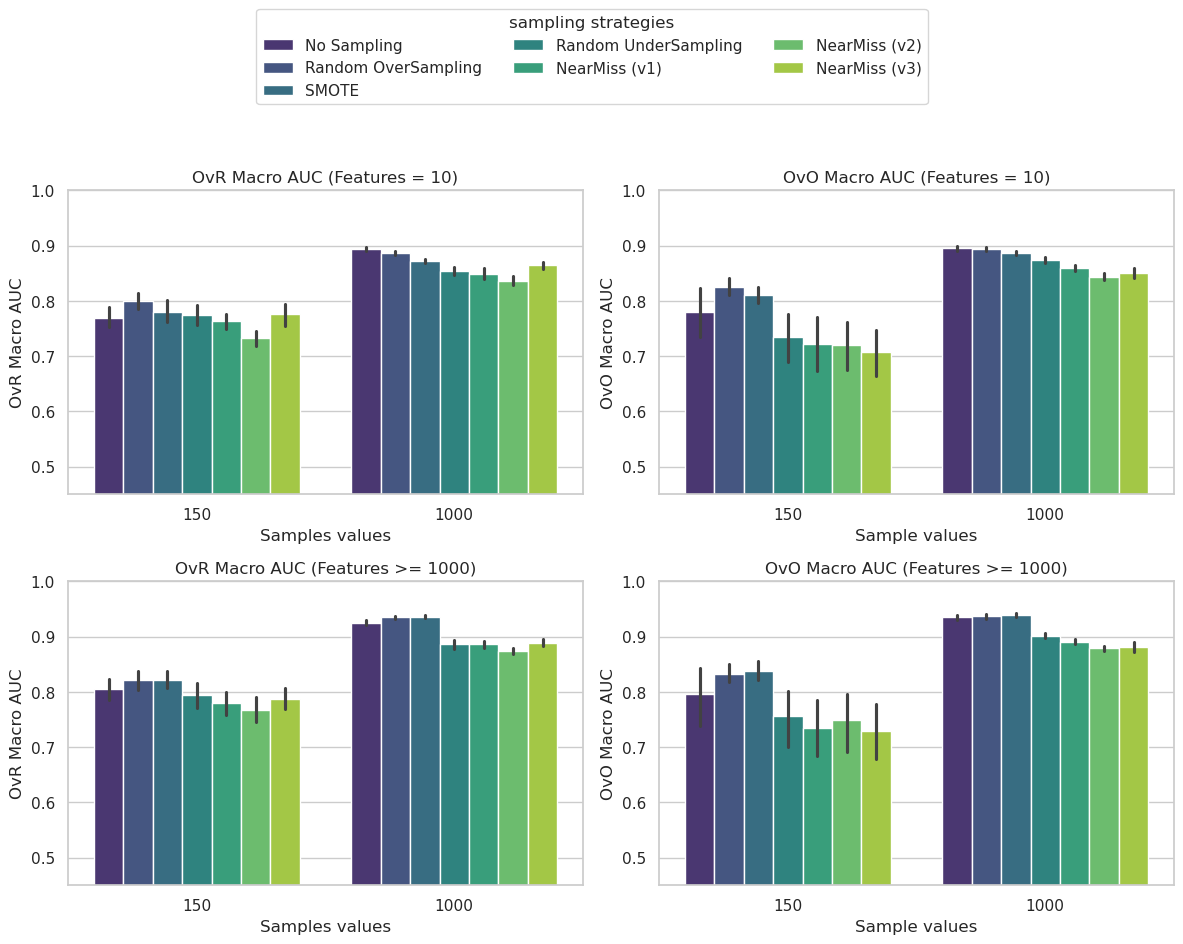

In [41]:
#read data
df = pd.read_csv("results/synthetic.csv")


sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

for idx, k in enumerate([10, 1000]):
     
    if k == 10:
         # For Features = 10
        subset_df = df[(df["Features (k)"] == k) & (df["Label"].str.contains("samples_values"))] 
    else:
        # For Features > 1000
        subset_df = df[(df["Features (k)"] >=k) & (df["Label"].str.contains("samples_values"))]  

    # Define common y-axis range
    y_min = 0.45
    y_max = 1
    
    # new labels for clear display
    short_labels = {
    "150_samples_values_syn.csv": "150",
    "1000_samples_values_syn.csv": "1000",
    }
    subset_df.loc[:, "Label"] = subset_df["Label"].replace(short_labels)
    
    
    ax = axes[idx//2, idx%2]
    
    # OVR macro Auc bar chart
    bar1=sns.barplot(x="Label", y="OvR Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.8)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,0].set_ylim(y_min, y_max)
    axes[idx, 0].set_xlabel("Samples values")
    
    # OVO macro auc bar chart
    bar2=sns.barplot(x="Label", y="OvO Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.8,legend=False)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,1].set_ylim(y_min, y_max)
    axes[idx, 1].set_xlabel("Sample values")
    
    # getting legend value from bar 1 and then removing it from bar 1
    handles, labels = bar1.get_legend_handles_labels()
    bar1.legend_.remove()  # Remove the legend from the bar1

# adding legend for clarity
fig.legend(handles, labels, title="sampling strategies", loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3)

plt.subplots_adjust(hspace=2, wspace=0.3)



# saving plot image 
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "n_samples_vs_sampling_strategy.png")
if not os.path.exists(filepath):
    plt.savefig(filepath)
else:
    os.remove(filepath)
    plt.savefig(filepath)
plt.tight_layout()
plt.show()

# weight=[0.95, 0.025, 0.025] vs models , sampling strategy =SMOTE

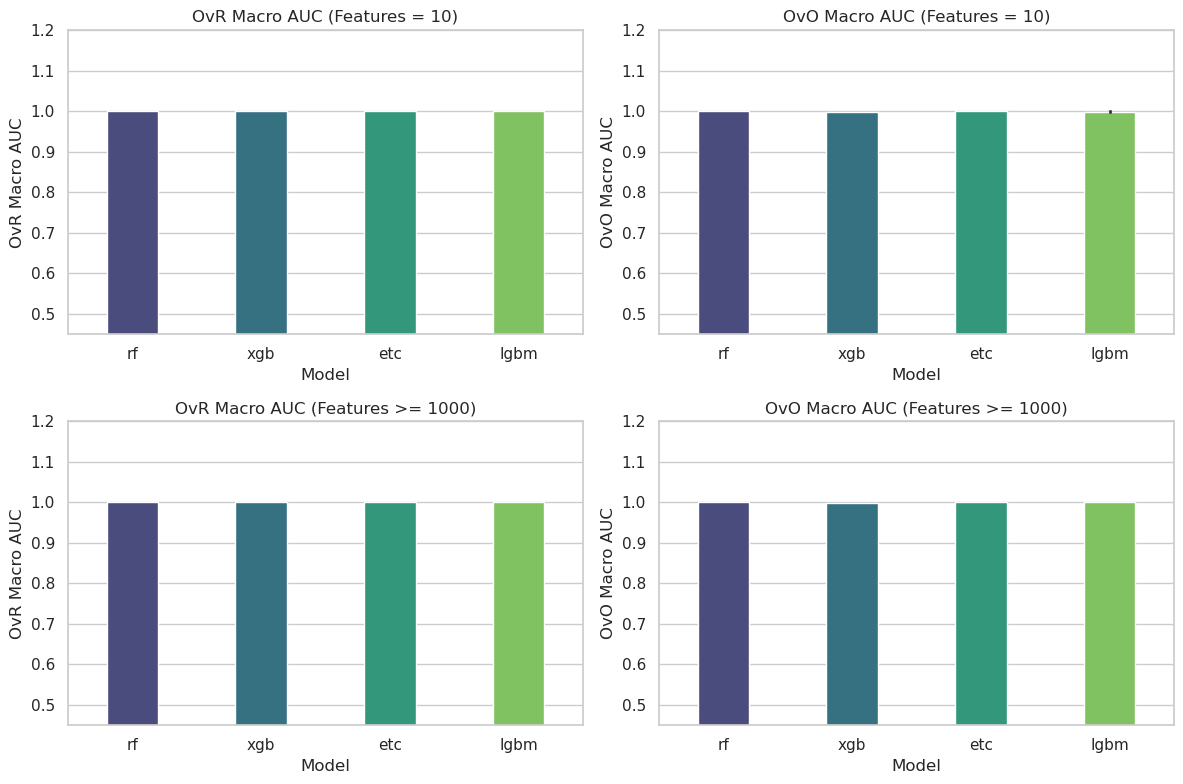

In [11]:
# the weights are highly imbalanced, therefore models will always give AUC score of 1
# SMOTE was applied prior to 5-fold cross-validation to prevent folds with fewer than k classes

df = pd.read_csv("results/synthetic.csv")

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

# Plot performance metrics for different feature sets
for idx, k in enumerate([10, 1000]):
     
    if k == 10:
         # For Features = 10
        subset_df = df[(df["Features (k)"] == k) & (df["Label"] == "Highly_imbalanced_SMOTE_applied.csv")] 
    else:
        # For Features > 1000
        subset_df = df[(df["Features (k)"] >=k) & (df["Label"] == "Highly_imbalanced_SMOTE_applied.csv")]  

    # Define common y-axis range
    y_min = 0.45
    y_max = 1.2

   
    
    # OvR Macro AUC (Bar Chart)
    ax = axes[idx//2, idx%2]
    sns.barplot(x="Model", y="OvR Macro AUC", hue="Model", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.4)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,0].set_ylim(y_min, y_max)

    # OvO Macro AUC bar chart
    sns.barplot(x="Model", y="OvO Macro AUC", hue="Model", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.4)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,1].set_ylim(y_min, y_max)
   
   
plt.subplots_adjust(hspace=0.8) # for proper spacing within plots 
# save the final plots in the result folder 
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "weight_[0.95, 0.025, 0.025]_vs_models.png")

# if plot name exists , drop and replace it with updated one 
if not os.path.exists(filepath):
    plt.savefig(filepath)
else:
    os.remove(filepath)
    plt.savefig(filepath)
plt.tight_layout()
plt.show()


    
  

# weight=[0.8, 0.2, 0.1] vs models vs sampling strategies

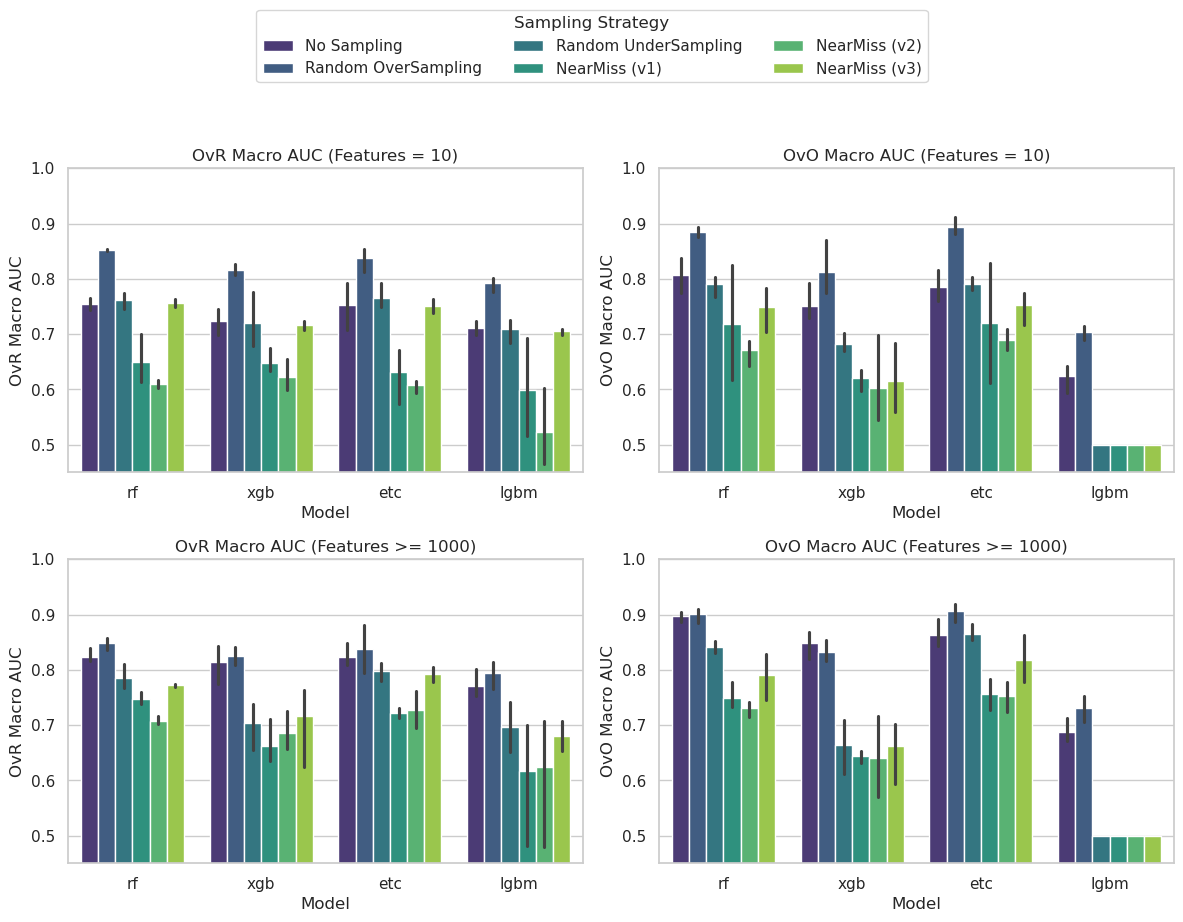

In [48]:

# read dataset
df = pd.read_csv("results/synthetic.csv")

sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

# Plot performance metrics for different feature sets
for idx, k in enumerate([10, 1000]):
     
    if k == 10:
         # For Features = 10 
        subset_df = df[(df["Features (k)"] == k) & (df["Label"] == "imbalanced_[0.8, 0.2, 0.1]_syn.csv")] 
    else:
        # For Features > 1000
        subset_df = df[(df["Features (k)"] >=k) & (df["Label"] == "imbalanced_[0.8, 0.2, 0.1]_syn.csv")]  

    # Define common y-axis range
    y_min = 0.45
    y_max = 1

   
    # OvR Macro AUC (Bar Chart)
    ax = axes[idx//2, idx%2]
    bar1=sns.barplot(x="Model", y="OvR Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.8)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,0].set_ylim(y_min, y_max)

    # OvO Macro AUC bar chart
    bar2=sns.barplot(x="Model", y="OvO Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.8,legend=False)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,1].set_ylim(y_min, y_max)

    # get legend from bar 1 and then remove from bar 1 for clear display 
    handles, labels = bar1.get_legend_handles_labels()
    bar1.legend_.remove()  # Remove the legend from the plot

# display legend 
fig.legend(handles, labels, title="Sampling Strategy", loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3)
plt.subplots_adjust(hspace=2, wspace=0.3) # for proper spacing within plots 



# save the plots in the result folder 
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "weight_[0.8, 0.2, 0.1]_vs_models.png")
if not os.path.exists(filepath):
    plt.savefig(filepath)
else:
    os.remove(filepath)
    plt.savefig(filepath)
plt.tight_layout()
plt.show()

# weight=[0.6, 0.3, 0.1] vs models vs sampling strategies

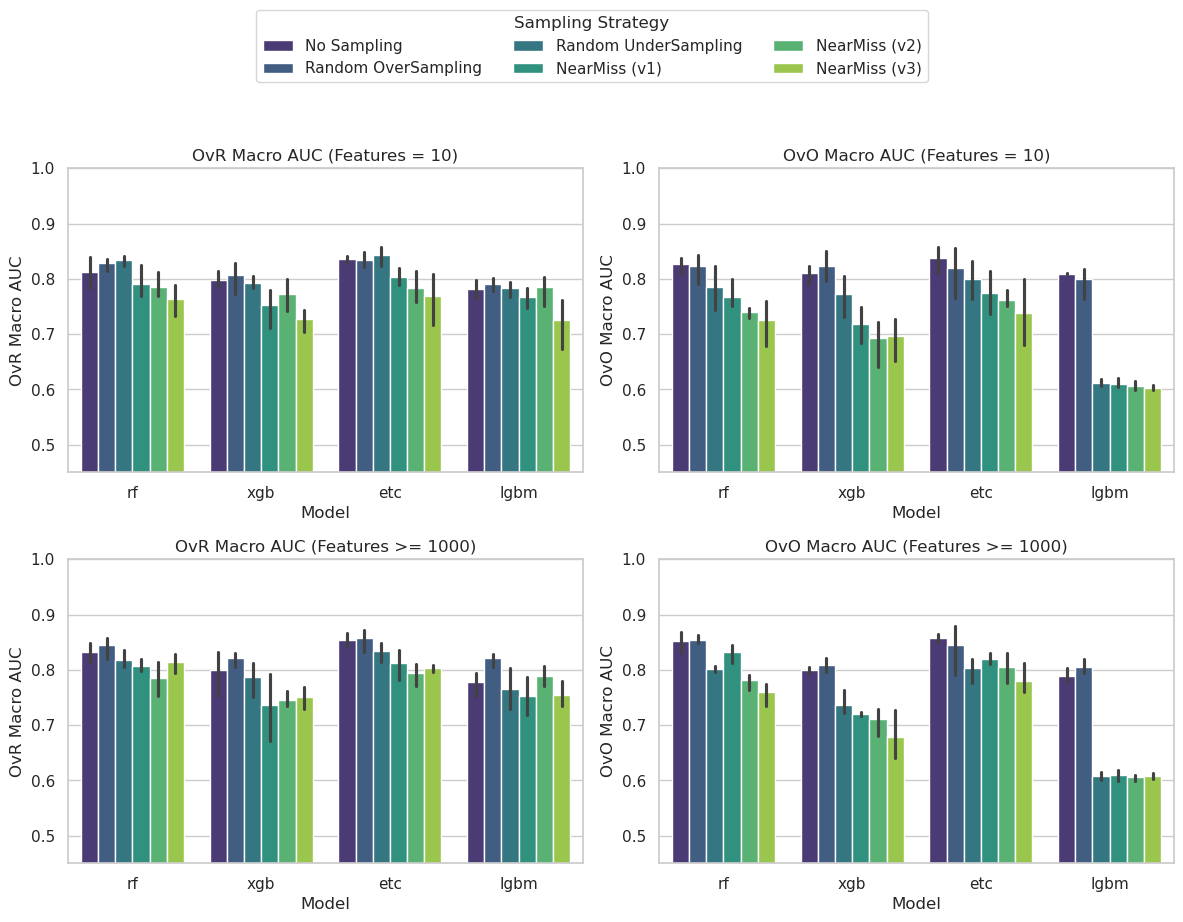

In [21]:
# read dataset
df = pd.read_csv("results/synthetic.csv")


sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(12, 8), gridspec_kw={'width_ratios': [1, 1]})

# Plot performance metrics for different feature sets
for idx, k in enumerate([10, 1000]):
     
    if k == 10:
         # For Features = 10 
        subset_df = df[(df["Features (k)"] == k) & (df["Label"] == "imbalanced_[0.6, 0.3, 0.1]_syn.csv")] 
    else:
        # For Features > 1000
        subset_df = df[(df["Features (k)"] >=k) & (df["Label"] == "imbalanced_[0.6, 0.3, 0.1]_syn.csv")]  

    # Define common y-axis range
    y_min = 0.45
    y_max = 1

   
    # OvR Macro AUC (Bar Chart)
    ax = axes[idx//2, idx%2]
    bar1=sns.barplot(x="Model", y="OvR Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,0], width=0.8)
    axes[idx,0].set_title(f"OvR Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,0].set_ylim(y_min, y_max)
    bar2=sns.barplot(x="Model", y="OvO Macro AUC", hue="Sampling_Strategy", data=subset_df, palette="viridis", ax=axes[idx,1], width=0.8,legend=False)
    axes[idx,1].set_title(f"OvO Macro AUC (Features {'=' if k == 10 else '>='} {k})")
    axes[idx,1].set_ylim(y_min, y_max)

    # get legend values from bar 1 and then remove from bar1 for clear display 
    handles, labels = bar1.get_legend_handles_labels()
    bar1.legend_.remove()  # Remove the legend from the plot

# display legend 
fig.legend(handles, labels, title="Sampling Strategy", loc="lower center", bbox_to_anchor=(0.5, 1.05), ncol=3)
plt.subplots_adjust(hspace=2, wspace=0.3) # for proper spacing between plots 

# save the final plot in the result folder 
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "weight_[0.6, 0.3, 0.1]_vs_models.png")

# if plot exists, drop and replace with updated plot 
if not os.path.exists(filepath):
    plt.savefig(filepath)
else:
    os.remove(filepath)
    plt.savefig(filepath)
plt.tight_layout()
plt.show()

# heatmaps

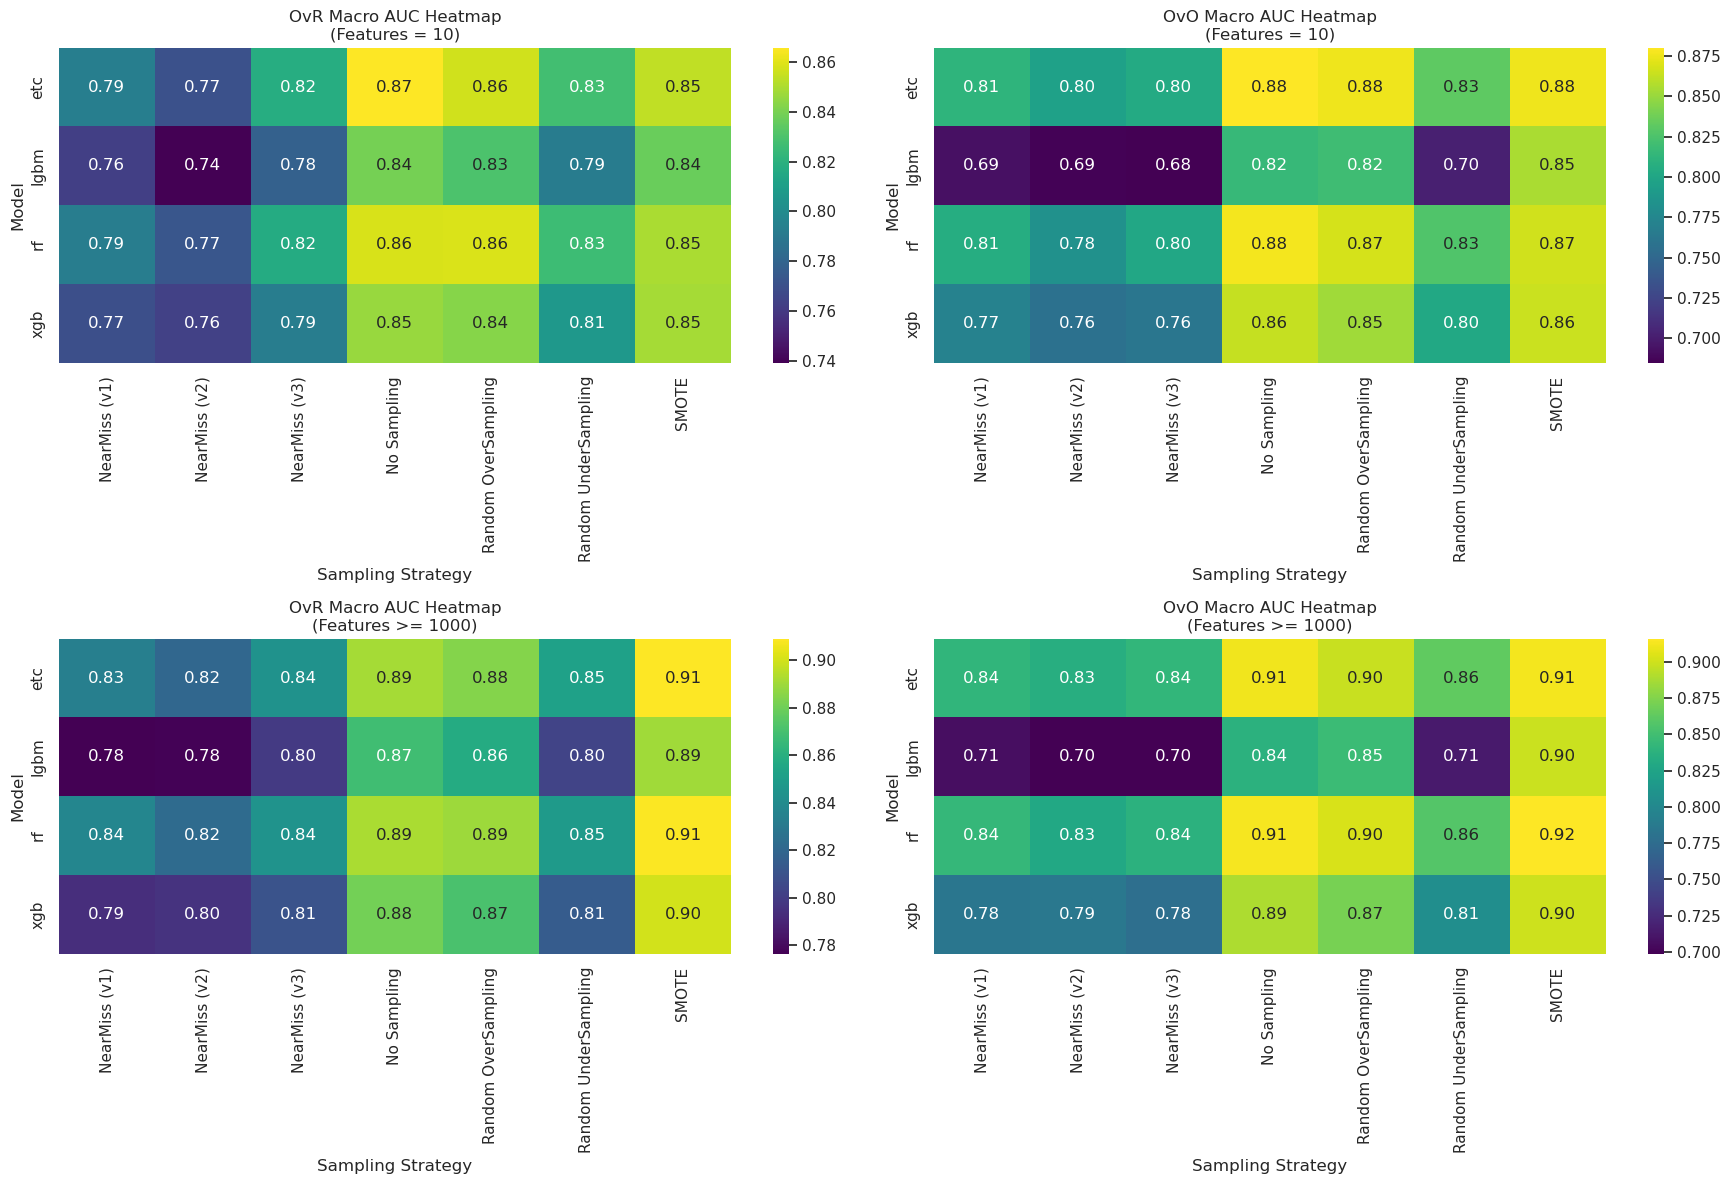

In [64]:

# Load data
df = pd.read_csv("results/synthetic.csv")

# Set plot style
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2, figsize=(18, 12))  # 2 side-by-side heatmaps

for idx, k in enumerate([10, 1000]):
    
    # Filter based on features and sample file
    if k == 10:
        subset_df = df[(df["Features (k)"] == k) ]
    else:
        subset_df = df[(df["Features (k)"] >= k) ]
    
    # Pivot table for heatmap: Rows = Models, Columns = Sampling, Values = OvR AUC
    pivot = subset_df.pivot_table(index="Model", columns="Sampling_Strategy", values="OvR Macro AUC")

    # Plot heatmap
    sns.heatmap(pivot, annot=True, cmap="viridis", fmt=".2f", ax=axes[idx,0])
    axes[idx,0].set_title(f"OvR Macro AUC Heatmap\n(Features {'=' if k == 10 else '>='} {k})", fontsize=12)
    axes[idx,0].set_xlabel("Sampling Strategy")
    axes[idx,0].set_ylabel("Model")

    # Pivot table for heatmap: Rows = Models, Columns = Sampling, Values = OvO AUC
    pivot = subset_df.pivot_table(index="Model", columns="Sampling_Strategy", values="OvO Macro AUC")

    # Plot heatmap
    sns.heatmap(pivot, annot=True, cmap="viridis", fmt=".2f", ax=axes[idx,1])
    axes[idx,1].set_title(f"OvO Macro AUC Heatmap\n(Features {'=' if k == 10 else '>='} {k})", fontsize=12)
    axes[idx,1].set_xlabel("Sampling Strategy")
    axes[idx,1].set_ylabel("Model")


plt.subplots_adjust(hspace=2, wspace=0.3) # for proper spacing between plots 


# save the final plot in the result folder 
save_dir="results/plots_images"
filepath=os.path.join(save_dir, "heatmap_model_vs_sampling_strategy_syn.png")

# if plot exists, drop and replace with updated plot 
if not os.path.exists(filepath):
    plt.savefig(filepath)
else:
    os.remove(filepath)
    plt.savefig(filepath)

plt.tight_layout()
plt.show()
